# Home Assignment: Visualizing fMRI Data on Depression

## Author: Lukas-Daniel Gerhards

**Program: Cognitive Neuropsychology (Research Master) - Vrije Universiteit Amsterdam**

**Course: Programming for Psychologists**

**Course coordinator: Matthias Nau, Anna van Harmelen**

Date: 02.12.2024






The Home Assignment is about visualizing fMRI data regarding a specific psychological or clinical concept. Here, we were meant to visualize the fMRI data and plot a Histogramm, showcasing the distribution of positive values through our code.

The fMRI data on depression used for this project stems from [NeuroSynth](https://neurosynth.org/), a meta-study platform providing results of thousands of fMRI studies. The used files can be downloaded from NeuroSynth in the section of [depression](https://neurosynth.org/analyses/terms/depression/): `uniformy test`, and `anatomical`. 

## Importing of packages

All necessary packages are imported into the notebook. 

In [22]:
# importing of all packages
import os
import glob
import nibabel as nib 
from nilearn import plotting
import matplotlib.pyplot as plt

['anatomical.nii', 'depression_uniformity-test_z_FDR_0.01.nii']


## Loading files and preparing data

Due to reusing purposes and efficient debugging, the relative paths via **OS** is used. Via the wildcard character * all files with the data type `.nii` are loaded into the current directory. Additionally, `anatomical_data` and `functional_data` is defined through the function selecting all files containing the corresonding names. For overview purposes, the output of the current directory, used files and labeled *anatomical data* and *functional data* is shown. The needed data is then being loaded through the `nib.load`function of the **Nibabel** package. 

In [46]:
# Defining the directory & depicting which one
data_dir = os.getcwd()
print("Current directory:", data_dir)

#Get and print file names ending with .nii in current directory
files = [os.path.basename(f) for f in glob.glob("*.nii")]
print("Found files:", files)

# Selecting the anatomical and functional data needed
anatomical_data = next(f for f in files if "anatomical" in f.lower())
functional_data = next(f for f in files if "uniformity" in f.lower())

# Printing the selected data
print("Anatomical data:", anatomical_data)
print("Functional data:", functional_data)

# Loading the data
anatomical_img = nib.load(os.path.join(data_dir, anatomical_data))
functional_img = nib.load(os.path.join(data_dir, functional_data))

Current directory: /Users/lukas/Desktop/Python/HomeAssignment
Found files: ['anatomical.nii', 'depression_uniformity-test_z_FDR_0.01.nii']
Anatomical data: anatomical.nii
Functional data: depression_uniformity-test_z_FDR_0.01.nii


## Data Visualization

the fMRI data is visualized with the `plotting` function of the **Nilearn** package. Here, the functional data is being plotted above the anatomical image which is set as a background for the statistical map. The voxel threshold is set at 0.1 to only visualize the regions with a statistical significance above 0.1. A colormap is chosen and the coordinates are set and oriented on the highest achievable z-score. This allows for more accurate assumptions of the typically involved regions that are active in patients with depression. 

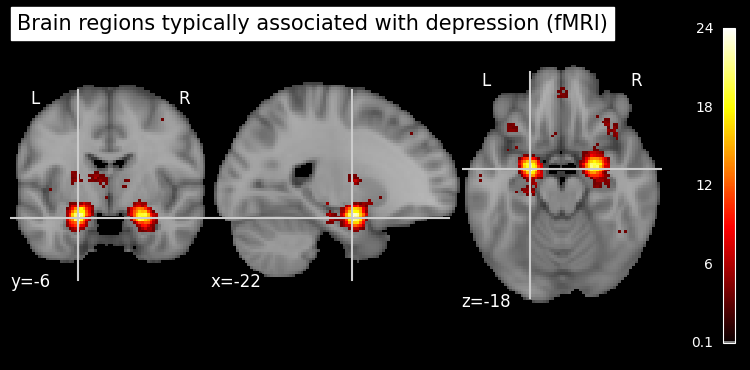

In [62]:

# Ploting the statistical map
plotting.plot_stat_map(
    functional_img,                                                        # Adding the functional data
    bg_img=anatomical_img,                                                 # Setting the anatomical scan as the background image
    threshold=0.1,                                                         # Threshold
    cmap="hot",                                                            # Colour map
    cut_coords=(-22, -6, -18),                                             # Data coordinates oriented on the highest achievable z-score
    title="Brain regions typically associated with depression (fMRI)"      # Title
)

# Printing the plot
plotting.show()

## Plotting of a Histogram of the values in the functional data file

Before the Histogram is plotted, the data is cleaned to only include all positive values > 0. The `ravel()`-function flattens data that is on a multi-dimensional (e.g. 3D or 4D) array to then simplify the process of selecting only positive values. 

The Histogram is plotted with all positive values of the data. The **bins** are set to 50 to ideally showcase the frequency of the Voxel Intensity Values. Next to the color of the bars, the **edgecolor** helps to distinguish each bar of the Histogram. The **labels** and the added **grid** allows for better interpretation of the Histogram. The optional `tight_layout`-function helps to tidy up the Histogram by allowing enough space to each item in the Histogram. 

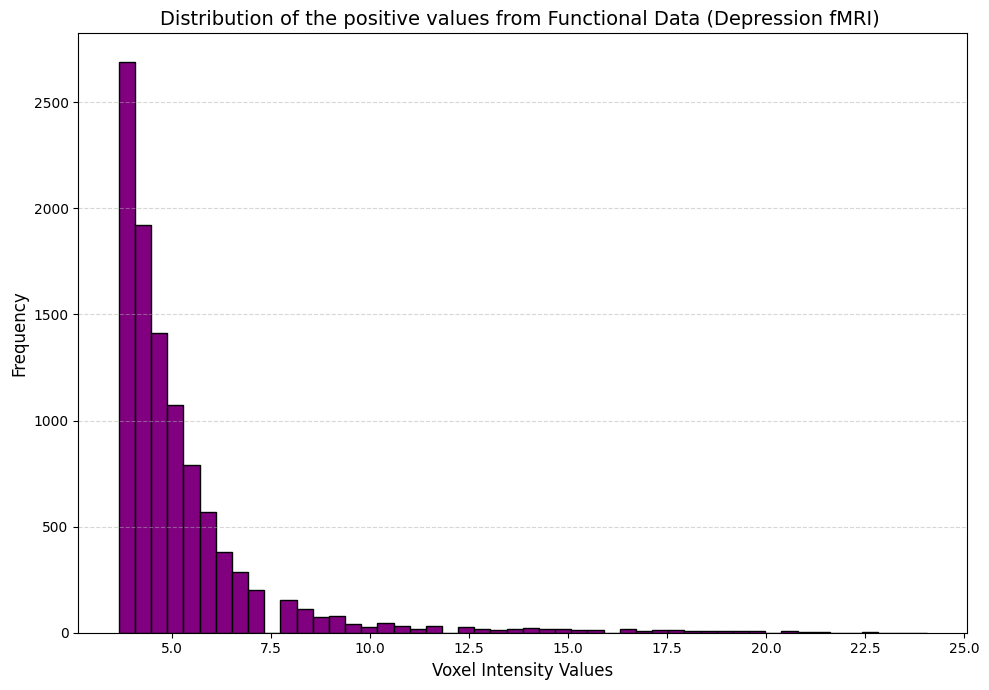

In [93]:
# Selecting all positive values (greater than 0) & flattening of the data. through ravel() incase data is 3D or 4D. 
functional_data = functional_img.get_fdata()
functional_data_flat = functional_data.ravel()
positive_values = functional_data_flat[functional_data_flat > 0]


#--------------- Plotting the histogram -------------------

plt.figure(figsize=(10, 7))                                                                             # Setting the figure size
plt.hist(positive_values, bins=50, color="purple", edgecolor="black")                                   # Plotting the histogram
plt.title("Distribution of the positive values from Functional Data (Depression fMRI) ", fontsize=14)   # Setting the title, labels and grid

plt.xlabel("Voxel Intensity Values", fontsize=12)                                                       # Setting the x labels
plt.ylabel("Frequency", fontsize=12)                                                                    # Setting the y labels

plt.grid(axis="y", linestyle="--", alpha=0.5)                                                           # Setting the grid

plt.tight_layout()                                                                                      # optional code to "tidy" figures and layouts 

plt.show()                                                                                              # Showing the plot